<a href="https://colab.research.google.com/github/feropiso/mat_computacional/blob/main/atividade_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. A aplicação e a demonstração visual da rotação horária de 90°, seguida de shear (cisalhamento) em x, conforme o procedimento mostrado no slide 60 ao slide 68 da apresentação “Matrix multiplication as composition”.

Vetor normal:


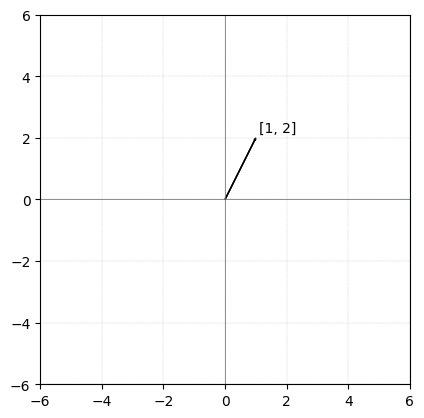

Vetor rotacionado no sentido horário:


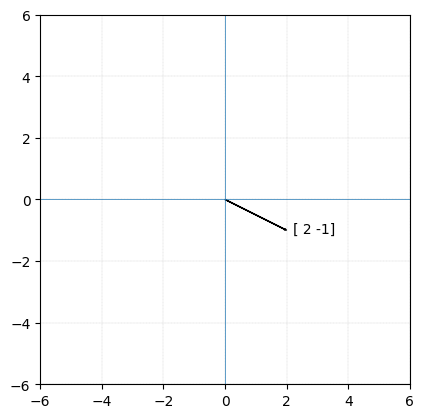

Vetor aplicando shear:


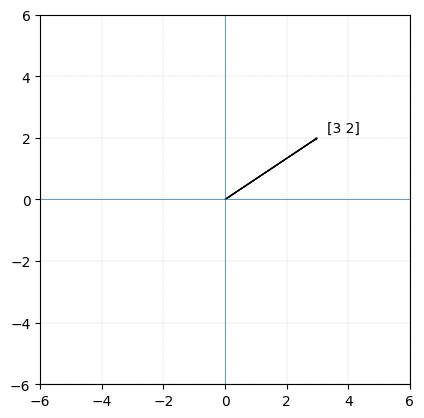

Vetor rotacionado no sentido horário e depois shear:


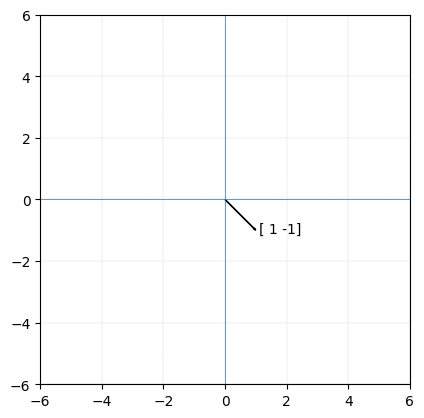

In [26]:
import numpy as np
import matplotlib.pyplot as plt

#Matriz transformação para sentido horário 90°
ROTACAO = np.array([[0, 1],
              [-1, 0]])

#Matriz transformação shear
SHEAR = np.array([[1, 1],
              [0, 1]])

def exibeVetorGraficamente(V):

  plt.figure()
  ax = plt.gca()
  ax.axhline(0, linewidth=0.5)
  ax.axvline(0, linewidth=0.5)

  ax.arrow(0, 0, V[0], V[1], head_width=0.05, length_includes_head=True)
  ax.text(V[0]*1.1, V[1]*1.1, str(V))

  ax.set_aspect('equal')
  ax.set_xlim(-6, 6)
  ax.set_ylim(-6, 6)
  plt.grid(True, linewidth=0.2, linestyle="--")
  plt.show()

def aplicarRotacaoSentidoHorario(V):
  V = np.asarray(V)
  return ROTACAO @ V

def aplicarShear(V):
  V = np.asarray(V)
  return SHEAR @ V

vetor = [1, 2]
print("Vetor normal:")
exibeVetorGraficamente(vetor)

print("Vetor rotacionado no sentido horário:")
exibeVetorGraficamente(aplicarRotacaoSentidoHorario(vetor))

print("Vetor aplicando shear:")
exibeVetorGraficamente(aplicarShear(vetor))

print("Vetor rotacionado no sentido horário e depois shear:")
exibeVetorGraficamente(aplicarShear(aplicarRotacaoSentidoHorario(vetor)))



2. Mostre visualmente e explique o valor do determinante depois das transformações

In [27]:
DET_ROT = np.linalg.det(ROTACAO)
DET_SH  = np.linalg.det(SHEAR)
DET_COMPOSTA = np.linalg.det(SHEAR @ ROTACAO)

print("det(ROTAÇÃO 90° horário) =", round(DET_ROT, 3))
print("det(SHEAR X)           =", round(DET_SH, 3))
print("det(SHEAR @ ROTACAO)   =", round(DET_COMPOSTA, 3))


det(ROTAÇÃO 90° horário) = 1.0
det(SHEAR X)           = 1.0
det(SHEAR @ ROTACAO)   = 1.0


O determinante = 1 em todos os casos indica que a transformação:
- preserva área (não expande nem reduz)
- não faz reflexão (sinal positivo)
- Mesmo após rotação seguida de shear (multiplicação de matrizes),
- a área do espaço unitário continua a mesma.


3. Para o seu caso, faça o mesmo procedimento mostrado no slide 70 até o slide 92 da apresentação “Matrix multiplication as composition".

In [28]:
def multiplica_matrizes(A, B):
    A = np.asarray(A)
    B = np.asarray(B)
    return A @ B

multiplica_matrizes(SHEAR, ROTACAO)

array([[-1,  1],
       [-1,  0]])

4. Faça o mesmo acima, mas invertendo a ordem das transformações.

Vetor normal:


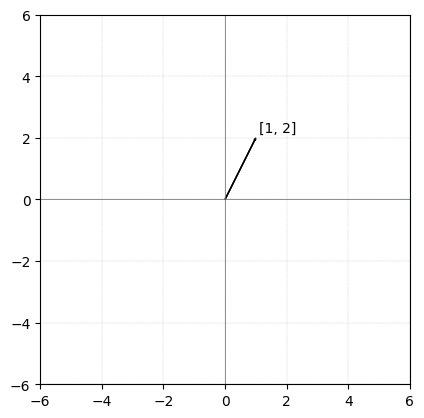

Vetor aplicando shear:


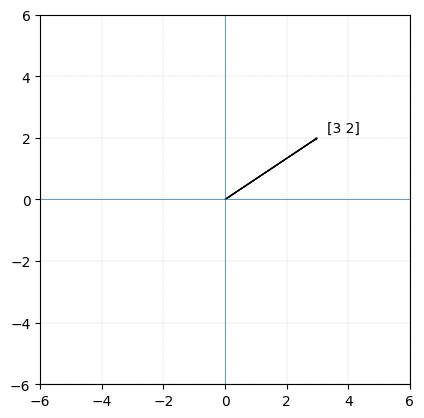

Vetor rotacionado no sentido horário:


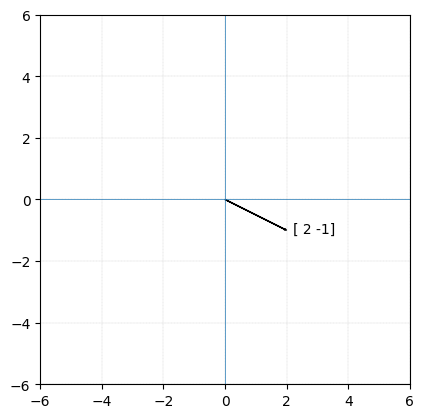

Vetor rotacionado no sentido horário e depois shear:


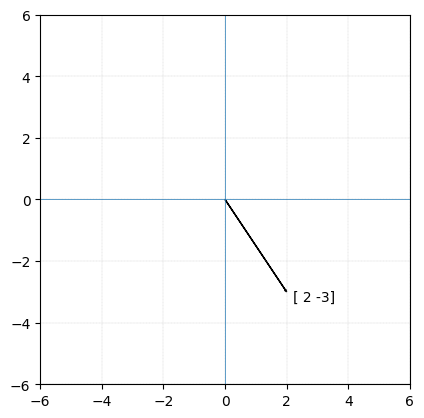

In [29]:
print("Vetor normal:")
exibeVetorGraficamente(vetor)

print("Vetor aplicando shear:")
exibeVetorGraficamente(aplicarShear(vetor))

print("Vetor rotacionado no sentido horário:")
exibeVetorGraficamente(aplicarRotacaoSentidoHorario(vetor))

print("Vetor rotacionado no sentido horário e depois shear:")
exibeVetorGraficamente(aplicarRotacaoSentidoHorario(aplicarShear(vetor)))

5. Faça uma transformação linear em um vetor x de duas dimensões para obter um vetor y orientado a 90° em relação a x. Calcule o produto escalar entre os dois vetores. Interprete o resultado.

In [31]:
#Matriz transformação para sentido anti-horário 90°
ANTI_ROTACAO = np.array([[0, -1],
              [1, 0]])

x = np.array([2, 3])

y = ANTI_ROTACAO @ x

dot = x @ y

print("x =", x)
print("y = rotação 90° de x =", y)
print("Produto escalar x·y =", dot)

if abs(dot) < 1e-9:
    print("Interpretação: o produto escalar é 0 → x e y são ortogonais (90° entre eles).")
else:
    print("Interpretação: o produto escalar não é 0 → a matriz alterou comprimentos/ângulos, então não é rotação ortogonal pura.")

x = [2 3]
y = rotação 90° de x = [-3  2]
Produto escalar x·y = 0
Interpretação: o produto escalar é 0 → x e y são ortogonais (90° entre eles).


1. Análise os resultados e escreva uma conclusão.

Conclusão:
- A multiplicação de matrizes é a representação algébrica da composição de transformações lineares no espaço;
- No plano 2D, aplicar uma rotação de 90° seguida de um shear em x é equivalente a multiplicar suas matrizes, obtendo uma nova matriz que reproduz o efeito combinado sobre qualquer vetor da base;
- A ordem muda o vetor final, porque transformações lineares não comutam (R·S ≠ S·R). Mesmo assim, a área global continua preservada porque det(ROT) = det(SHEAR) = 1.